# Assignment 1

Name: Max Yuhas <br>
Professor: Smita Krishnaswamy

## Problem 1
1.	Multilayer Perceptron – A simple singular output multilayer perceptron network could be useful for time-series prediction. Here the inputs would be values from times t, t-1, t-2, ..., t-n that would be used to predict the output value at t+1. This could be used to predict weather or climate, stock or commodity price, or product sales over time.
2.	Convolutional Neural Network – These neural networks move window filters across a data matrix. For this reason, CNNs are extremely useful on images. CNNs allow one to identify features in an image, such as edges, corners, and then eventually full parts of an image. For example, CNNs are good for facial recognition, identifying edges and corners, then parts of the face such as eyes, mouths, noses, etc.
3.	Recurrent Neural Networks – These networks had internal loops that allow them to learn previous inputs in making a decision. This is why they are particularly useful in text analysis, because they take into account the previous words in a sentence in predicting the next word (each word's context here obviously matters). This also means RNN's would be very useful in time-series analyses like I mentioned for a multilayer perceptron. It would allow you to predict future events, such as temperature or stock price, using previous data points. The RNN structure allows the network to learn the recent input data and use it in predicting future values.
4.	Autoencoder – Autoencoders force an original input down to a smaller set of dimensions  (encode the input) and then expand it back to the same output size (decode). These networks are very good for data compression. One example would be audio compression. If an audio clip has too much data and needs to be sent via the Internet, then there may not be enough bandwidth to send the original clip. Instead, an autoencoder could be used to compress the data clip to a fewer dimensions and then reconstruct it after it has been sent. This could be used for an online music streaming service.
5.	Ultra deep learning – Ultra deep neural network models have been used to accurately predict de novo protein contacts and improving the folding of newly designed test proteins. https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1005324
6.	Deep reinforcement learning – Deep reinforcement learning is a semi-supervised deep learning model that looks to maximize an objective. Examples in class included learning to play chess or other board games. These networks have been used to optimize chemical reactions as well, by optimizing the experimental conditions based on maximizing the reaction output. https://pubs.acs.org/doi/full/10.1021/acscentsci.7b00492

## Problem 2

### Part 1 and 2

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


<Figure size 2160x1440 with 0 Axes>

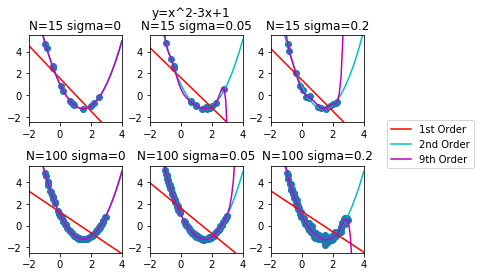

In [16]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#Set random seed to generate the same results
random.seed(1)


#Define figure and axis for sub plots to print all plots in one.
plt.figure(figsize=(30,20))
fig, ax = plt.subplots(2,3)
#Define a DataFrame to store all of our information for our fits. Not sure if this is the best way...
store = pd.DataFrame(data = {'N':[15,15,15,100,100,100],'sigma':[0,0.05,0.2,0,0.05,0.2],
                             '1st Order Weights':[0,0,0,0,0,0],'2nd Order Weights':[0,0,0,0,0,0],
                             '9th Order Weights':[0,0,0,0,0,0],'1st Order MSE':[0,0,0,0,0,0],
                             '2nd Order MSE':[0,0,0,0,0,0],'9th Order MSE':[0,0,0,0,0,0]},dtype = object)

index = 0
N = [15,100] #Initial size values
sigma = [0,0.05,0.2] #Standard deviation values
for i in range(len(N)):
    for j in range(len(sigma)):
        x = np.random.uniform(low=-1.0,high=3.0,size=N[i])
        x.sort() #Sort our x values, so they plot better.
        noise = np.random.normal(loc=0.0,scale=sigma[j],size=N[i])
        y = x**2 - 3.0*x + 1.0 + noise
        #Make matrices for each degree, add 1 to the range to make sure it is of proper length.
        #I need to transpose this original matrix so it is (100,dim) vs (dim,100) to calculate weights.
        X1 = np.array([x**i for i in reversed(range(1+1))]).T
        X2 = np.array([x**i for i in reversed(range(2+1))]).T
        X9 = np.array([x**i for i in reversed(range(9+1))]).T
        #Now solve for the weights, polynomial degree 2
        w1 = np.dot(np.linalg.inv(np.dot(X1.T,X1)), np.dot(X1.T,y))
        store.loc[index,'1st Order Weights'] = np.round(w1,5)
        w2 = np.dot(np.linalg.inv(np.dot(X2.T,X2)), np.dot(X2.T,y))
        store.loc[index,'2nd Order Weights'] = np.round(w2,5)
        w9 = np.dot(np.linalg.inv(np.dot(X9.T,X9)), np.dot(X9.T,y))
        store.loc[index,'9th Order Weights'] = np.round(w9,5)
        
        #Produce set of predicted y-values using these weights.
        yvals1 = w1[0]*x + w1[1]*np.ones(N[i])
        yvals2 = w2[0]*(x**2) + w2[1]*x + w2[2]*np.ones(N[i])
        yvals9 = (w9[0]*(x**9) + w9[1]*(x**8) + w9[2]*(x**7) + w9[3]*(x**6) + w9[4]*(x**5) 
        + w9[5]*(x**4) + w9[6]*(x**3) + w9[7]*(x**2) +w9[8]*x + w9[9]*np.ones(N[i]))
        
        #Define polynomials to plot.
        p1 = np.poly1d(w1)
        p2 = np.poly1d(w2)
        p9 = np.poly1d(w9)
        xnew = np.linspace(-2,4,50)
        y1 = p1(xnew)
        y2 = p2(xnew)
        y9 = p9(xnew)
        
        #Calulcate and store MSE values
        MSE1 = (1/N[i])*sum((y-yvals1)**2)
        store.loc[index,'1st Order MSE'] = MSE1
        MSE2 = (1/N[i])*sum((y-yvals2)**2)
        store.loc[index,'2nd Order MSE'] = MSE2
        MSE9 = (1/N[i])*sum((y-yvals9)**2)
        store.loc[index,'9th Order MSE'] = MSE9
        #Plotting information.
        ax[i,j].set_xlim([-2, 4])
        ax[i,j].set_ylim([-2.5, 5.5])
        ax[i,j].scatter(x,y)
        fig.suptitle("y=x^2-3x+1")
        fig.subplots_adjust(hspace=0.5,wspace=0.3)
        ax[i,j].set_title("N="+str(N[i])+" sigma="+str(sigma[j]))
        ax[i,j].plot(xnew,y1,'r',label="1st Order")
        ax[i,j].plot(xnew,y2,'c',label="2nd Order")
        ax[i,j].plot(xnew,y9,'m',label="9th Order")
        ax[1,1].legend(loc='center left', bbox_to_anchor=(2.5, 1.25))
        #Change Index to move to next row in data frame.
        index = index+1

In [2]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199
store
#Here are the weights and MSE for all the fits above.

,N,sigma,1st Order Weights,2nd Order Weights,9th Order Weights,1st Order MSE,2nd Order MSE,9th Order MSE
0,15,0,"[-1.26133, 1.16604]","[1.0, -3.0, 1.0]","[-0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 1.0, -3.0, 1.0]",1.23034,9.90349e-30,5.09203e-12
1,15,0.05,"[-1.3654, 2.07457]","[0.99427, -2.99322, 0.99428]","[0.07727, -0.64781, 1.79121, -1.22129, -2.12782, 2.61986, 0.70664, -0.02572, -3.21783, 1.02518]",1.10235,0.00211962,0.000771399
2,15,0.2,"[-0.99958, 1.42205]","[0.98212, -2.93878, 1.01985]","[0.11757, -1.08721, 3.51409, -3.84842, -2.08714, 6.00111, -0.64804, -1.5389, -2.79261, 1.2854]",1.73037,0.0306615,0.0121977
3,100,0,"[-0.96375, 1.24603]","[1.0, -3.0, 1.0]","[0.0, -0.0, 0.0, -0.0, -0.0, 0.0, -0.0, 1.0, -3.0, 1.0]",1.54854,4.14472e-30,4.80505e-17
4,100,0.05,"[-1.0491, 1.33908]","[0.99944, -3.0023, 1.01029]","[-0.00213, 0.02092, -0.0747, 0.10003, 0.01914, -0.12729, 0.00462, 1.05737, -2.97979, 1.00345]",1.39524,0.00210578,0.00191246
5,100,0.2,"[-1.03644, 1.61535]","[0.99025, -2.99668, 1.01404]","[-0.02, 0.15089, -0.2898, -0.26997, 1.13371, -0.16313, -1.15162, 1.2393, -2.66862, 1.00137]",1.59955,0.0334802,0.0287481


**Comments:** <br>
It is clear to see that the 1st order model underfits our data. The straight line fit does not properly model the parabolic shape of the points (and of the true model). We get the highest MSE for each of our tests. The 9th order model is overfitting our data. This is particularly easy to see in the N=15 graphs, where the polynomial line is going through almost every single point and then tailing off in extreme directions. The MSE is lowest here, but this is because we are overfitting. The 2nd order model best fits the data. We have a very low MSE and the curve falls well across all the points. Most importantly, it is clear that newly generated points based on the $y=x^2-3x+1$ model will fit well along this curve.

It is important to note that in the cases where $\sigma=0$ (i.e. there is no noise), that the 9th order polynomial fits the data perfectly (all of the higher order weights are zero). Thus it has essentially the exact same fit as the 2nd order model and we do not see any overfitting.

### Part 3

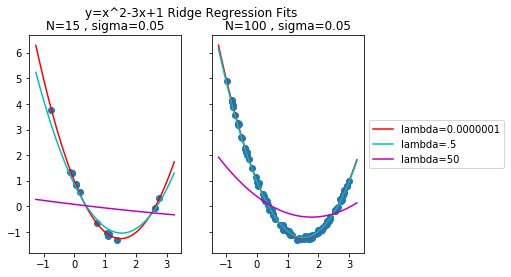

In [3]:
#Choose range of lamdbas to test for in l2 regularization (ridge regression).
#I'm only going to fit these ridge regression models for 2nd order polynomials.
#1) We know this is how the data is modeled and 2) it gave us the best fits above.

#Set random seed to generate the same results
random.seed(1)

fig, (ax1,ax2) = plt.subplots(1,2,sharey=True)
fig.suptitle("y=x^2-3x+1 Ridge Regression Fits")
fig.subplots_adjust(hspace=0.5)

lambdas = [0.0000001,.5,50]
N = [15,100]

#For N=15
x = np.random.uniform(low=-1.0,high=3.0,size=N[0])
x.sort() #Sort our x values, so they plot better.
noise = np.random.normal(loc=0.0,scale=0.05,size=N[0])
y = x**2 - 3.0*x + 1.0 + noise
X = np.array([x**i for i in reversed(range(2+1))]).T

#find weights
w_s = np.dot(np.linalg.inv(lambdas[0]*np.identity(n = X.shape[1]) + np.dot(X.T,X)), np.dot(X.T,y))
w_n = np.dot(np.linalg.inv(lambdas[1]*np.identity(n = X.shape[1]) + np.dot(X.T,X)), np.dot(X.T,y))
w_b = np.dot(np.linalg.inv(lambdas[2]*np.identity(n = X.shape[1]) + np.dot(X.T,X)), np.dot(X.T,y))

#polynomial fits
p_s = np.poly1d(w_s)
p_n = np.poly1d(w_n)
p_b = np.poly1d(w_b)
xnew = np.linspace(-1.25,3.25,50)
y_s = p_s(xnew)
y_n = p_n(xnew)
y_b = p_b(xnew)

#calculate predictions for MSE
yvals_s = w_s[0]*(x**2) + w_s[1]*x + w_s[2]*np.ones(N[0])
yvals_n = w_n[0]*(x**2) + w_n[1]*x + w_n[2]*np.ones(N[0])
yvals_b = w_b[0]*(x**2) + w_b[1]*x + w_b[2]*np.ones(N[0])

#calculate MSE
MSE_s = (1/N[0])*sum((y-yvals_s)**2)
MSE_n = (1/N[0])*sum((y-yvals_n)**2)
MSE_b = (1/N[0])*sum((y-yvals_b)**2)

#store info
store_ridgereg15 = pd.DataFrame(data = {'Lambdas':lambdas,'Weights':[w_s,w_n,w_b],
                                        'MSE':[MSE_s,MSE_n,MSE_b]},dtype=object)

ax1.scatter(x,y)
ax1.set_title('N=15 , sigma=0.05')
ax1.plot(xnew,y_s,'r',label="lambda=0.0000001")
ax1.plot(xnew,y_n,'c',label="lambda=.5")
ax1.plot(xnew,y_b,'m',label="lambda=50")

#Repeat For N=100
x = np.random.uniform(low=-1.0,high=3.0,size=N[1])
x.sort() #Sort our x values, so they plot better.
noise = np.random.normal(loc=0.0,scale=0.05,size=N[1])
y = x**2 - 3.0*x + 1.0 + noise
X = np.array([x**i for i in reversed(range(2+1))]).T

w_s = np.dot(np.linalg.inv(lambdas[0]*np.identity(n = X.shape[1]) + np.dot(X.T,X)), np.dot(X.T,y))
w_n = np.dot(np.linalg.inv(lambdas[1]*np.identity(n = X.shape[1]) + np.dot(X.T,X)), np.dot(X.T,y))
w_b = np.dot(np.linalg.inv(lambdas[2]*np.identity(n = X.shape[1]) + np.dot(X.T,X)), np.dot(X.T,y))

p_s = np.poly1d(w_s)
p_n = np.poly1d(w_n)
p_b = np.poly1d(w_b)
xnew = np.linspace(-1.25,3.25,50)
y_s = p_s(xnew)
y_n = p_n(xnew)
y_b = p_b(xnew)

yvals_s = w_s[0]*(x**2) + w_s[1]*x + w_s[2]*np.ones(N[1])
yvals_n = w_n[0]*(x**2) + w_n[1]*x + w_n[2]*np.ones(N[1])
yvals_b = w_b[0]*(x**2) + w_b[1]*x + w_b[2]*np.ones(N[1])

MSE_s = (1/N[1])*sum((y-yvals_s)**2)
MSE_n = (1/N[1])*sum((y-yvals_n)**2)
MSE_b = (1/N[1])*sum((y-yvals_b)**2)

store_ridgereg100 = pd.DataFrame(data = {'Lambdas':lambdas,'Weights':[w_s,w_n,w_b],
                                         'MSE':[MSE_s,MSE_n,MSE_b]},dtype=object)

ax2.scatter(x,y)
ax2.set_title('N=100 , sigma=0.05')
ax2.plot(xnew,y_s,'r',label="lambda=0.0000001")
ax2.plot(xnew,y_n,'c',label="lambda=.5")
ax2.plot(xnew,y_b,'m',label="lambda=50")

ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [4]:
#Stored coefficients and MSE for N=15
store_ridgereg15

,Lambdas,Weights,MSE
0,1e-07,"[0.9892452463390797, -2.988499092820499, 1.0035242903774766]",0.00210223
1,0.5,"[0.8034964532288007, -2.4800723037512435, 0.8744461839933875]",0.0528708
2,50,"[0.006325936514293845, -0.14646620664252036, 0.08355000883691797]",1.66658


In [5]:
#Stored coefficients and MSE for N=100
store_ridgereg100

,Lambdas,Weights,MSE
0,1e-07,"[0.9988191361277698, -2.9907731588552937, 0.9907814012022731]",0.00270407
1,0.5,"[0.9741539539722768, -2.923323917042532, 0.9743365954181122]",0.00389021
2,50,"[0.2555488070370774, -0.907812082004491, 0.3914528037877151]",1.16045


**Comments:** <br>
Here, we see that a very large $\lambda$ value, such as $\lambda=50$ results in underfitting the data. Like the line in part 1, it does not capture the true nature of the data. This high regularization parameter is forcing the weights to be too small, particularly we see the second weight ($-3x$ term) does not get close to $-3$.
A very small $\lambda$ ($\lambda$ = 0.0000001) will allow the weights to get as close as possible to the original model. This is likely to overfit the data as the weights will essentially memorize the data we have, these models will not generalize well to new data. This however, is not easily observable in my graphs above.
$\lambda=0.5$ provides small enough regularization for the weights to be properly scaled and for the model to generalize well to new data. We can see this curve fits the data well, but does not necessarily touch every single point for N=15 as does the $\lambda=0.0000001$ curve.

## Problem 3

### Part 1 and 2 - kNN classification and cross-validation

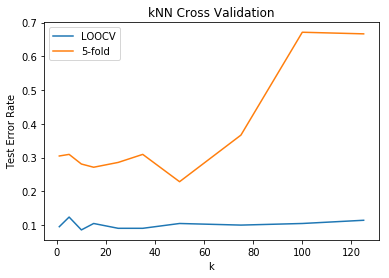

In [6]:
import os
from sklearn.neighbors import NearestNeighbors
import sklearn.model_selection

#Set random seed to generate the same results
random.seed(1)

os.chdir('/Users/max_yuhas/Dropbox/Yale/Junior/CPSC 663/Assignment1')
df = pd.read_csv('data_seed.dat',header=None)

for i in range(len(df)):
    test = df[0].str.split('\t')[i]
    test = [x for x in test if x != '']
    df.loc[i,0] = test

data = pd.DataFrame(df[0].values.tolist(),columns=['Area','Perimeter','Compactness',
                    'Len. Kernel','Wid. Kernel','Asym Coef',
                    'Len. Kernel Groove','Class Number'])
data = data.apply(pd.to_numeric)
    

K = [1,5,10,15,25,35,50,75,100,125]

#Leave-One-Out Cross Validation
LOOCVerror = [0]*len(K)
for k in range(len(K)): #Loop through all K values.
    correct = [0]*len(data)
    for x in range(len(data)): #Loop through each observation for LOOCV.
        l = list(range(len(data)))
        l.remove(x)
        trainX = data.drop(['Class Number'],axis=1).loc[l,:] #All the data except the test point (leave-one-out).
        testX = data.drop(['Class Number'],axis=1).loc[x,:] #Just the test point.
        testX = np.reshape(np.array(testX),(1,7))
        #Find nearest neighbors. We can use built in packages here if needed.
        NN = NearestNeighbors(K[k])
        NN.fit(trainX)
        dist,ind = NN.kneighbors(testX)
        #Get output values for all the k nearest neighbors.
        classes = list(data.loc[list(ind[0]),'Class Number'])
        #Determine prediction based on maximum vote of nearest neighbors.
        prediction = int(max(classes,key=classes.count))
        if prediction == data.loc[x,'Class Number']:
            correct[x] = 1 #Change value to 1 if prediction correct.
    LOOCVerror[k] = 1-np.mean(correct)
LOOCVerror
plt.plot(K,LOOCVerror,label='LOOCV')
plt.ylabel("Test Error Rate")
plt.xlabel("k")

#n-fold Cross Validation
nfolds = 5
kf = sklearn.model_selection.KFold(nfolds,shuffle=True)
train_sets = []
test_sets = []
for train_index, test_index in kf.split(data):
    train_sets.append(train_index)
    test_sets.append(test_index)

kfolderror = [0]*len(K)

for k in range(len(K)): #Loop through all K values.
    avgfolderror = [0]*nfolds
    for x in range(nfolds):
        trainindex = list(train_sets[x])
        testindex = list(test_sets[x])
        trainX = data.drop(['Class Number'],axis=1).loc[trainindex,:]
        testX = data.drop(['Class Number'],axis=1).loc[testindex,:]
        NN = NearestNeighbors(K[k])
        NN.fit(trainX)
        dist,ind = NN.kneighbors(testX)
        correct = [0]*len(testindex)
        for i in range(len(testindex)):
            classes = list(data.loc[list(ind[i]),'Class Number'])
            prediction = int(max(classes,key=classes.count))
            if prediction == data.loc[testindex[i],'Class Number']:
                correct[i] = 1
        avgfolderror[x] = 1-np.mean(correct)
    kfolderror[k] = np.mean(avgfolderror)

kfolderror
plt.plot(K,kfolderror,label='5-fold')
plt.title("kNN Cross Validation")
plt.ylabel("Test Error Rate")
plt.xlabel("k")
plt.legend()

**Comments:** <br>
I explored a larger range of k values (k = {1,5,10,15,25,35,50,75,100,125})to get a better sense of how error changes with k. As k increases in size, the test error first decreases then begins to increase again. If k=1, then we the model is only using the closest neighbor to classify the test point, thus the model is highly dependent on the output value of one single point. These k values are overfitting the data. However, if very high (~k=100), then the model relies on too many points (many of which are not very close neighbors) to predict the test point's output. Thus it is possible the predictions are incorrect because they are influenced too much by these distance "neighborhood point". These large k values are underfitting the data. With a medium sized k (5-15), the model relies on only the closest neighbors to determine the test point's predicted output.

When we do 5-fold cross validation, we always get higher error rates. Holding out an entire fifth of the observations for testing means it is likely that many of the closest neighbors to any single test point are also in the test set and thus are not used in the prediction. This will then affect our predictive capabilites, as the model relies too much on points that are more distant "neighbors". This is similar to having a large k value above. Talking with Matt Amodio, I mentioned that this is obviously a poor approach with few data points, but he mentioned that k-fold cross validation has a stronger computational advantage when building a k-nearest neighbor classifier on extremely large data sets (it is computationally costly to do LOOCV on millions of data points).

### Part 3 - Logistic Regression Classification

In [7]:
from sklearn import linear_model

#Set random seed to generate the same results
random.seed(1)

#We still want to do 5-fold cross validation.
lr_testerror = [0]*nfolds
lr_trainerror = [0]*nfolds
for x in range(nfolds):
    trainindex = list(train_sets[x])
    testindex = list(test_sets[x])
    trainX = data.drop(['Class Number'],axis=1).loc[trainindex,:]
    trainY = data.loc[trainindex,'Class Number']
    testX = data.drop(['Class Number'],axis=1).loc[testindex,:]
    testY = data.loc[testindex,'Class Number']
    #Fit multinomial logistic regression
    multi_lr = linear_model.LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(trainX, trainY)
    test_pred = multi_lr.predict(testX)
    testerror = 1 - sum(test_pred == testY)/len(testY)
    lr_testerror[x] = testerror
    
    train_pred = multi_lr.predict(trainX)
    trainerror = 1 - sum(train_pred == trainY)/len(trainY)
    lr_trainerror[x] = trainerror
    
avg_lr_testerror = np.mean(lr_testerror)
avg_lr_trainerror = np.mean(lr_trainerror)
print("Avg. Linear Regression Train Error:",avg_lr_trainerror)
print("Avg. Linear Regression Test Error:",avg_lr_testerror)

Avg. Linear Regression Train Error: 0.0738095238095238
Avg. Linear Regression Test Error: 0.0857142857142857


### Part 3 - Linear Discriminant Analysis (LDA)

In [8]:
from sklearn import discriminant_analysis

#Set random seed to generate the same results
random.seed(1)

lda_testerror = [0]*nfolds
lda_trainerror = [0]*nfolds
for x in range(nfolds):
    trainindex = list(train_sets[x])
    testindex = list(test_sets[x])
    trainX = data.drop(['Class Number'],axis=1).loc[trainindex,:]
    trainY = data.loc[trainindex,'Class Number']
    testX = data.drop(['Class Number'],axis=1).loc[testindex,:]
    testY = data.loc[testindex,'Class Number']
    #Fit multinomial logistic regression
    multi_lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(trainX, trainY)
    test_pred = multi_lda.predict(testX)
    testerror = 1 - sum(test_pred == testY)/len(testY)
    lda_testerror[x] = testerror
    
    train_pred = multi_lda.predict(trainX)
    trainerror = 1 - sum(train_pred == trainY)/len(trainY)
    lda_trainerror[x] = trainerror
    
avg_lda_testerror = np.mean(lda_testerror)
avg_lda_trainerror = np.mean(lda_trainerror)
print("Avg. LDA Train Error:",avg_lda_trainerror)
print("Avg. LDA Test Error:",avg_lda_testerror)

Avg. LDA Train Error: 0.030952380952380953
Avg. LDA Test Error: 0.03333333333333335


**Comments:**<br>
I performed two different classification techniques: multinomial logistic regression and linear discriminant analysis. The LDA classification worked better than the logisitic regression model. The training and testing error were both significantly lower on average across the 5 validation folds. The test error rate for LDA was roughly 3.3%. Neither of these models showed issues of overfitting as the test error rates where very similar to the training errors. Both of these performed much better than the leave-one-out k-nearest neighbor classification model, which had an error rate around 10% for the optimal k range. They did significantly worse than the 5-fold k-NN model, which has an error rate around 25% at a similar set of optimal k values).

## Problem 4

### Part 1

To show that multiply the weights and biases in a perceptron network by any constant $c>0$ does not change the output, we must just show that the output of one single perceptron does not change when the input weights and bias is multiplied by $c$.

We know that any single perceptron has the following output:
$$wx + b ≥ 0, \text{the output is 1} \\ wx + b < 0, \text{the output is 0}$$.
We can expand the vector multiplication of wx, multiply it all by c, and rewrite the left hand side of these inequalities as the following:
$$c*w1x1 + c*w2x2 + ... + c*wnxn + c*b$$
We can arrange terms so that we get the following:
$$c*( w1x1 + w2x2 + ... + wnxn + b) = c*(wx + b)$$
It is then clear to see that for $c>0$, this scaling will not change the sign of the left hand side of these inequalities and thus the output of any single perceptron will be unchanged. Therefore, the entire network of perceptrons will have an identical output.

### Part 2

If we replace these simple perceptrons with sigmoid neurons, then the output for each neuron is now the following:
$$\frac{1}{1+exp(-c*(wx+b))}$$ 
We can see that as $c\rightarrow\infty$, the magnitude of the exponential power in the denominator will increase. If $z=wx+b>0$, then $exp(-c*z)\rightarrow exp(-\infty) \rightarrow 0$ and so the output will approach one. Similarly, if $z=wx+b<0$, then $exp(-c*z)\rightarrow exp(\infty) \rightarrow \infty$ and the output will approach zero. We can see that these are identical to the result in part 1. If $z=wx+b=0$, then $exp(-c*z)=exp(0)=1$, so our output will always be $\frac{1}{2} which is not accounted for in the simple perceptron model above.

### Part 3

In [9]:
W = [0.6,-0.7,0.5,0.4,-0.6,0.8,1,1]
b = [-0.4,-0.5,-0.5]

def perceptron(X):
    z1 = W[0]*X[0] + W[2]*X[1] + W[4]*X[2] + b[0]
    if z1 < 0:
        x4 = 0
    else:
        x4 = 1
    z2 = W[1]*X[0] + W[3]*X[1] + W[5]*X[2] + b[1]
    if z2 < 0:
        x5 = 0
    else:
        x5 = 1
    z3 = W[6]*x4 + W[7]*x5 + b[2]
    if z3 < 0:
        output = 0
    else:
        output = 1
    return output

In [10]:
perceptron_output = pd.DataFrame()
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            perceptron_output = perceptron_output.append({'X1':i,'X2':j,'X3':k,
                                                    'Output':perceptron([i,j,k])},
                                                    ignore_index=True)

In [11]:
perceptron_output[['X1','X2','X3','Output']]

,X1,X2,X3,Output
0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0
2,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,1.0
4,1.0,0.0,0.0,1.0
5,1.0,0.0,1.0,0.0
6,1.0,1.0,0.0,1.0
7,1.0,1.0,1.0,1.0


### Part 4

In [12]:
def sig_perceptron(X):
    z1 = W[0]*X[0] + W[2]*X[1] + W[4]*X[2] + b[0]
    x4 = 1/(1+np.exp(-z1))
    z2 = W[1]*X[0] + W[3]*X[1] + W[5]*X[2] + b[1]
    x5 = 1/(1+np.exp(-z2))
    z3 = W[6]*x4 + W[7]*x5 + b[2]
    output = 1/(1+np.exp(-z3))
    return output

In [13]:
sig_perceptron_output = pd.DataFrame()
for i in [0,1]:
    for j in [0,1]:
        for k in [0,1]:
            sig_perceptron_output = sig_perceptron_output.append({'X1':i,'X2':j,'X3':k,
                                                        'Output':sig_perceptron([i,j,k])},
                                                         ignore_index=True)

In [14]:
sig_perceptron_output[['X1','X2','X3','Output']]

,X1,X2,X3,Output
0,0.0,0.0,0.0,0.569265
1,0.0,0.0,1.0,0.585012
2,0.0,1.0,0.0,0.622459
3,0.0,1.0,1.0,0.633144
4,1.0,0.0,0.0,0.569867
5,1.0,0.0,1.0,0.575084
6,1.0,1.0,0.0,0.617326
7,1.0,1.0,1.0,0.628311


### Part 5

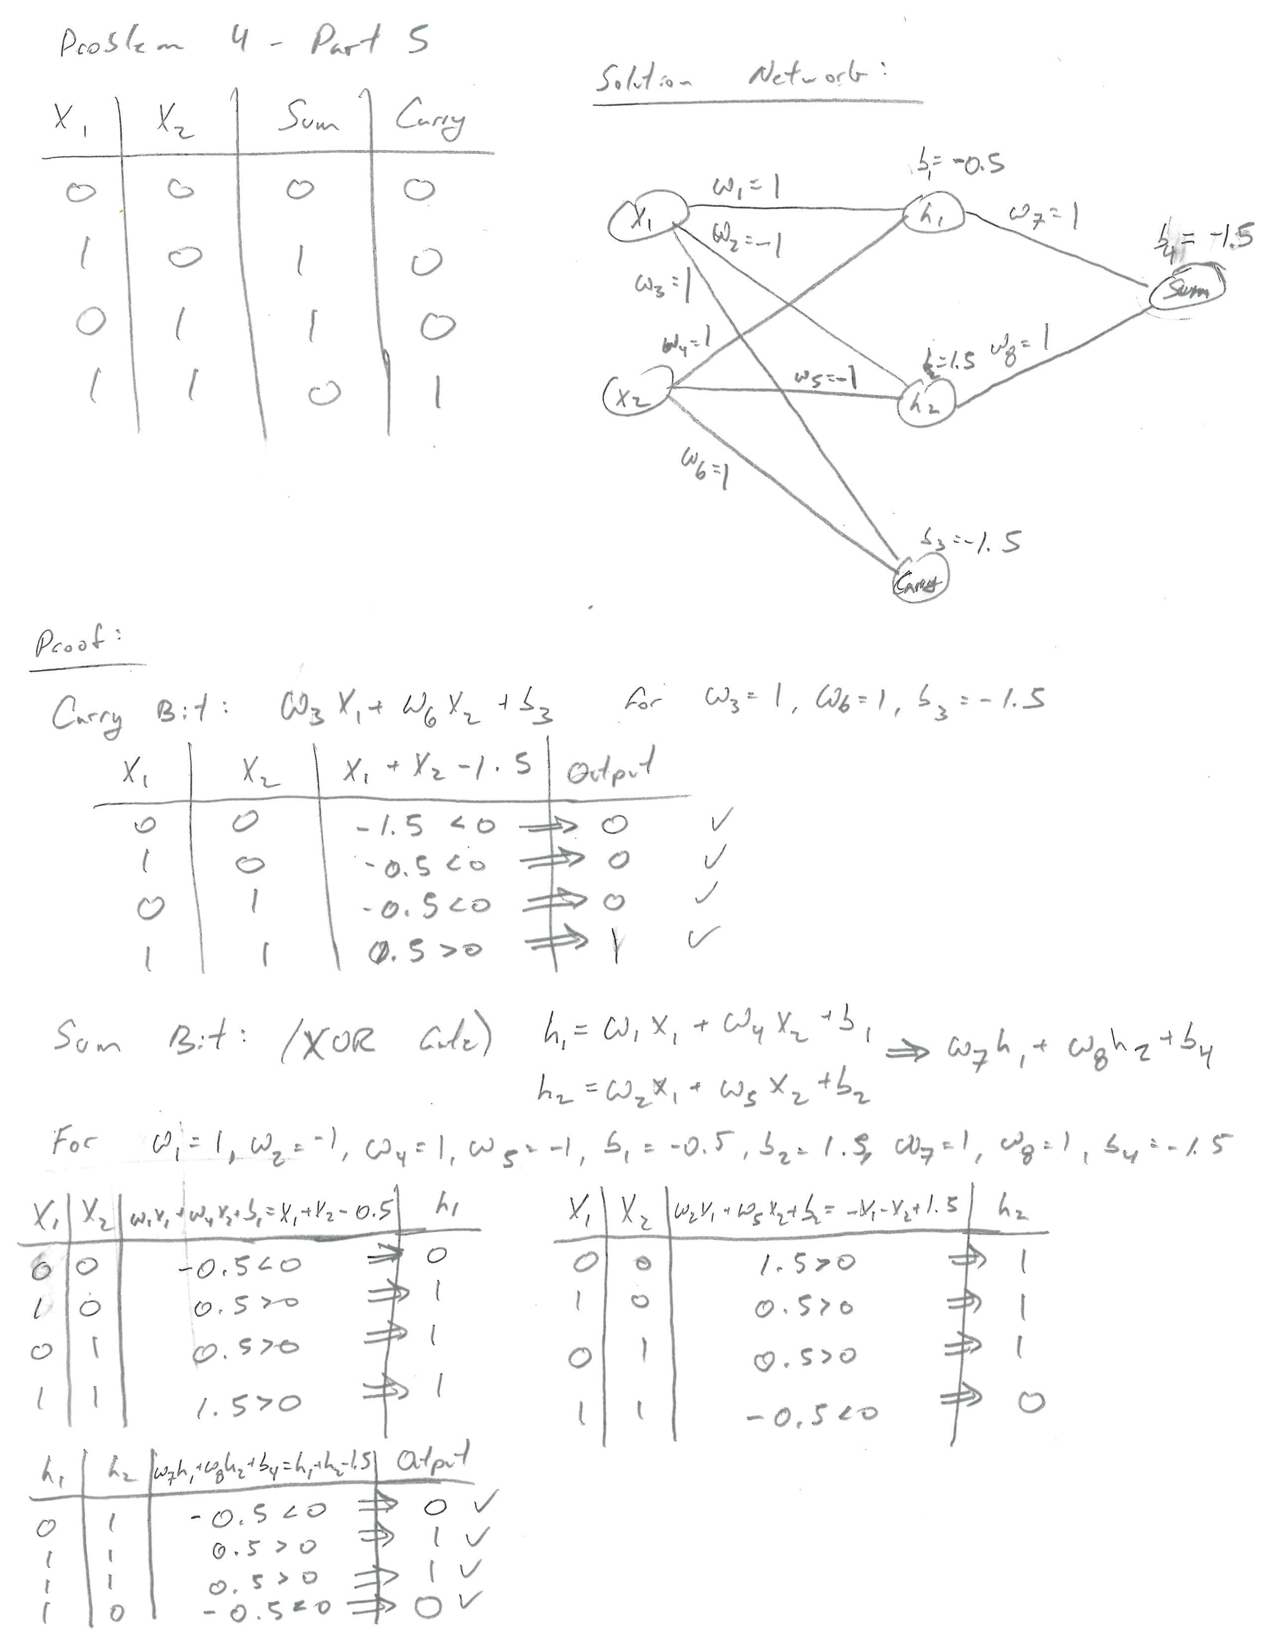

In [15]:
from IPython.display import display, Image
display(Image(filename='BinaryAdder.png'))